CAFOS pipeline TUTORIAL (for spectroscopy)
---
Installation instructions are in the github (https://github.com/GerardGM99/CAHA-CAFOS-pipeline/tree/main).

This tutorial goes over the reduction of your spectroscopic images using the pipeline. Everything can be run in the terminal. I use UBUNTU 22.04.4 (with WSL), and it should work on MAC (Windows I don't know). The basic steps are:

BEFORE ANYTHING
1. Make sure you are in the correct environment and have the required packages installed
2. Put your fits files in a new folder in the working directory if you haven't already


REDUCTION 

We'll go throught the reduction steps using a test set. This example shows how to run the pipeline in a Jupyter notebook, but the same can be applied to the terminal.

1. Open terminal and move to the CAFOS-pipeline directory and start python (or open jupyter lab/jupyter notebook)
2. Import the main module (CAHA_CAFOS_pipe), and input the name of the folder with your images and the starting letter or letters of your files (in this case, *test-copy* and *caf*, respectively)

In [3]:
import CAHA_CAFOS_pipe as caf

 * Input directory where your data are:  test-copy
 * What letter/word do all your input files begin with? (end input with *, exemple: caf*)  caf*


 * Functions used for the reduction
   - general_calibrations(): bias, flats, and wave calibrations
   - science(): sky substraction, alignment, and spectrum extraction
   - flux_calibration(): flux calibration of reduced images


When giving the starting letters of your images, the * means *anything*. So in this case, the code will use only the files which names start with *caf* and are followed by anything else.

Bias, flats, and wavelenght calibrations (*general_calibrations()*)
---
The structure of the code is simple. The above three function do the three main steps of the reduction, and you need to call them one by one. Each function calls other functions from the calibration.py file. When reducing real images, you'll want to start with **general_calibrations()**, which runs **apply_master_bias()**, **apply_master_flat()** and **wavelength_calibration()** from calibration.py.

In [3]:
#caf.general_calibrations()

In this example we'll call the functions from calibration.py directly to see what they do individually, so we need to import calibration.py (NOT NEEDED OTHERWISE)

In [4]:
import calibration as calib

In [6]:
# Identifies bias images and then creates and applies the master bias to the other images
calib.apply_master_bias(plot=True)

  0%|          | 0/32 [00:00<?, ?it/s]

Reading test-copy/caf-20240720-15:22:33-cal-cali.fits
Reading test-copy/caf-20240720-15:23:41-cal-cali.fits
Reading test-copy/caf-20240720-15:24:48-cal-cali.fits
Reading test-copy/caf-20240720-15:25:56-cal-cali.fits
Reading test-copy/caf-20240720-15:27:03-cal-cali.fits
Reading test-copy/caf-20240720-15:28:11-cal-cali.fits
Reading test-copy/caf-20240720-15:29:18-cal-cali.fits
Reading test-copy/caf-20240720-15:30:26-cal-cali.fits
Reading test-copy/caf-20240720-15:31:34-cal-cali.fits
Reading test-copy/caf-20240720-15:32:41-cal-cali.fits
Number of BIAS exposures: 10
>>> =============================================
>>> STATISTICAL SUMMARY:
>>> ---------------------------------------------
>>> Number of points.........: 1760000
>>> Minimum..................: 0.0
>>> 1st Quartile.............: 671.1
>>> Median...................: 672.6
>>> Mean.....................: 678.1126793208873
>>> 3rd Quartile.............: 674.1
>>> Maximum..................: 15277.777777777777
>>> ------------------

/home/haumea/anaconda3/envs/CAFOS/lib/python3.8/site-packages/fontTools/misc/py23.py:11: DeprecationWarning: The py23 module has been deprecated and will be removed in a future release. Please update your code.
  warnings.warn(


  0%|          | 0/22 [00:00<?, ?it/s]

test-copy/caf-20240720-14:28:32-cal-cali.fits [flat] Dome  N.0001
test-copy/caf-20240720-14:29:44-cal-cali.fits [flat] Dome  N.0002
test-copy/caf-20240720-14:30:57-cal-cali.fits [flat] Dome  N.0003
test-copy/caf-20240720-14:32:09-cal-cali.fits [flat] Dome  N.0004
test-copy/caf-20240720-14:33:21-cal-cali.fits [flat] Dome  N.0005
test-copy/caf-20240720-14:34:33-cal-cali.fits [flat] Dome  N.0006
test-copy/caf-20240720-14:35:46-cal-cali.fits [flat] Dome  N.0007
test-copy/caf-20240720-14:36:58-cal-cali.fits [flat] Dome  N.0008
test-copy/caf-20240720-14:38:10-cal-cali.fits [flat] Dome  N.0009
test-copy/caf-20240720-14:39:23-cal-cali.fits [flat] Dome  N.0010
test-copy/caf-20240720-14:44:12-cal-cali.fits [arc]  N.0001
test-copy/caf-20240720-14:45:22-cal-cali.fits [arc]  N.0002
test-copy/caf-20240720-14:46:33-cal-cali.fits [arc]  N.0003
test-copy/caf-20240720-14:47:52-cal-cali.fits [arc]  N.0001
test-copy/caf-20240720-14:48:59-cal-cali.fits [arc]  N.0002
test-copy/caf-20240720-14:50:07-cal-cali

---
During the reduction, some images are created for verification. These are stored in a folder named *plots* within the folder with the fits files (in this example, *test-copy/plots*). In case you DO NOT want these plots (to save space in your machine for example), you can set **plot=False** to the functions in *CAHA_CAFOS_pipe.py*.


In [7]:
# Identifies flats and then creates and applies the master flat to the other images
calib.apply_master_flat(plot=True)

  0%|          | 0/22 [00:00<?, ?it/s]

Grism/Slit combination: green-200, 129.0 micron


  0%|          | 0/10 [00:00<?, ?it/s]

Number of FLATS exposures: 10
Combining 10 images
- Normalized z_caf-20240720-14:28:32-cal-cali.fits
- Normalized z_caf-20240720-14:29:44-cal-cali.fits
- Normalized z_caf-20240720-14:30:57-cal-cali.fits
- Normalized z_caf-20240720-14:32:09-cal-cali.fits
- Normalized z_caf-20240720-14:33:21-cal-cali.fits
- Normalized z_caf-20240720-14:34:33-cal-cali.fits
- Normalized z_caf-20240720-14:35:46-cal-cali.fits
- Normalized z_caf-20240720-14:36:58-cal-cali.fits
- Normalized z_caf-20240720-14:38:10-cal-cali.fits
- Normalized z_caf-20240720-14:39:23-cal-cali.fits
Saving N1_master_flat_green-200_129.0.fits


  0%|          | 0/12 [00:00<?, ?it/s]

---
Flatfielding image: z_caf-20240720-14:44:12-cal-cali.fits  --> File 1 / 12
Output file name.: fz_caf-20240720-14:44:12-cal-cali.fits
---
Flatfielding image: z_caf-20240720-14:45:22-cal-cali.fits  --> File 2 / 12
Output file name.: fz_caf-20240720-14:45:22-cal-cali.fits
---
Flatfielding image: z_caf-20240720-14:46:33-cal-cali.fits  --> File 3 / 12
Output file name.: fz_caf-20240720-14:46:33-cal-cali.fits
---
Flatfielding image: z_caf-20240720-14:47:52-cal-cali.fits  --> File 4 / 12
No master flat with this grism/slit combination: green-200/257.0
---
Flatfielding image: z_caf-20240720-14:48:59-cal-cali.fits  --> File 5 / 12
No master flat with this grism/slit combination: green-200/257.0
---
Flatfielding image: z_caf-20240720-14:50:07-cal-cali.fits  --> File 6 / 12
No master flat with this grism/slit combination: green-200/257.0
---
Flatfielding image: z_caf-20240720-20:29:37-sci-wavm.fits  --> File 7 / 12
Output file name.: fz_caf-20240720-20:29:37-sci-wavm.fits
---
Flatfielding ima

---
As you can see in the information given by the code, different grism/flats configurations are identified and master flats are created and applied accordingly, so there is no need to worry about what different configs you have in your folder.

In [8]:
# Finally, all the wavelength calibrations
calib.wavelength_calibration(plot=True)

Grism/Slit combination: green-200, 129.0 micron
--> Saving PDF file: test-copy/plots/xpeaks_reference_green-200_129.0_fitpeak.pdf
--> Saving PDF file: test-copy/plots/xpeaks_reference_green-200_129.0.pdf
Number of matches: 11
Indexes of matches: [ 2  3  5  6  9 11 16 30 32 38 45]
Corresponding wavelengths: [ 4046.56   4358.33   4678.15   4799.91   5085.82   5460.74   6438.47
  7800.268  7947.603  8521.162 10139.8  ]
>>> CRPIX1.............: 1.0 pix
>>> CRVAL1 linear scale: 3572.6070224273726 Angstrom
>>> CDELT1 linear scale: 4.483945112509153 Angstrom / pix
>>> CRMAX1 linear scale: 10742.43525732951 Angstrom

>>> Fitted coefficients pixel(wavelength):
 [-1.43474246e+03  6.24618280e-01 -9.29494703e-05  1.06415575e-08
 -6.23560769e-13  1.51270906e-17]
>>> Residual std.........................: 0.285515359446581 pix

>>> Fitted coefficients wavelength(pixel):
 [ 3.56895051e+03  3.65506357e+00  1.44825285e-03 -9.32185227e-07
  2.84497900e-10 -4.08553126e-14]
>>> Residual std...............

Finding peaks:   0%|          | 0/101 [00:00<?, ?it/s]

--> Saving PDF file: test-copy/plots/slice1_xpeaks_image_green-200_129.0.pdf


Finding peaks:   0%|          | 0/401 [00:00<?, ?it/s]

--> Saving PDF file: test-copy/plots/slice2_xpeaks_image_green-200_129.0.pdf


Finding peaks:   0%|          | 0/201 [00:00<?, ?it/s]

--> Saving PDF file: test-copy/plots/slice3_xpeaks_image_green-200_129.0.pdf
--> Saving PDF file: test-copy/plots/fit_cdistortion_green-200_129.0.pdf
--> Saving PDF file: test-copy/plots/cdistortion_green-200_129.0.pdf


Computing wavelength calibration:   0%|          | 0/1100 [00:00<?, ?it/s]

>>> minimum CRVAL1 linear: 3569.634868339634 Angstrom
>>> maximum CRMAX1 linear: 10745.315739710139 Angstrom
>>> mean CDELT1..........: 4.4876052979177645 Angstrom
--> Saving result in FITS file: test-copy/wavecal_green-200_129.0_fz_caf-20240720-14:44:12-cal-cali.fits
--> Saving PDF file: test-copy/plots/fit_wavelengths_green-200_129.0_p1.pdf
--> Saving PDF file: test-copy/plots/fit_wavelengths_green-200_129.0_p2.pdf
>>> Using CDELT1: 1 pix
>>> Using CRVAL1: 3572.6070224273726 Angstrom
>>> Using CDELT1: 4.483945112509153 Angstrom / pix


Applying wavelength calibration:   0%|          | 0/1100 [00:00<?, ?it/s]

--> Saving PDF file: test-copy/plots/data_comparison_green-200_129.0.pdf
--> Saving PDF file: test-copy/plots/data_comparison_green-200_129.0.pdf
--> Saving PDF file: test-copy/plots/data_comparison_green-200_129.0.pdf
--> Saving PDF file: test-copy/plots/data_comparison_green-200_129.0.pdf
--> Saving PDF file: test-copy/plots/data_comparison_green-200_129.0.pdf
--> Saving PDF file: test-copy/plots/data_comparison_green-200_129.0.pdf
--> Saving PDF file: test-copy/plots/data_comparison_green-200_129.0.pdf
--> Saving PDF file: test-copy/plots/data_comparison_green-200_129.0.pdf
--> Saving PDF file: test-copy/plots/data_comparison_green-200_129.0.pdf
--> Saving PDF file: test-copy/plots/data_comparison_green-200_129.0.pdf
--> Saving PDF file: test-copy/plots/data_comparison_green-200_129.0.pdf
Total number of science files ...: 4


  0%|          | 0/4 [00:00<?, ?it/s]

Sky substraction, alignment and spectrum extraction (*science()*)
---
This part is semiautomatic, meaning most of it is automatic, but you'll need to give some inputs (e.g., the ranges for sky substraction). This is all run with **science()**, which in turn runs **sky_substraction()**, **spec_align()** and **spec_extract()** from calibration.py. From now on, you'll have to select which science image you want to reduce, and repeat for each of them (future update, option to reduce all science images at once).

In [6]:
#caf.science()

  0%|          | 0/4 [00:00<?, ?it/s]

---
Index  //  filename  //  objectname
---
0  //  wfz_caf-20240720-20:29:37-sci-wavm.fits  //  HZ_21 g200
1  //  wfz_caf-20240720-20:38:31-sci-wavm.fits  //  Feige_66 g200
2  //  wfz_caf-20240720-22:24:10-sci-wavm.fits  //  AT2024psn G200
3  //  wfz_caf-20240720-22:47:40-sci-wavm.fits  //  AT2024psn G200
---


Chose file (select index from 0 to 3):  1


---
NAXIS1=1600
NAXIS2=1100
crpix1: 1.0 pix
crval1: 3.5726070224274e-07 m
cdelt1: 4.4839451125092e-10 m / pix
cunit1: 1.0 m


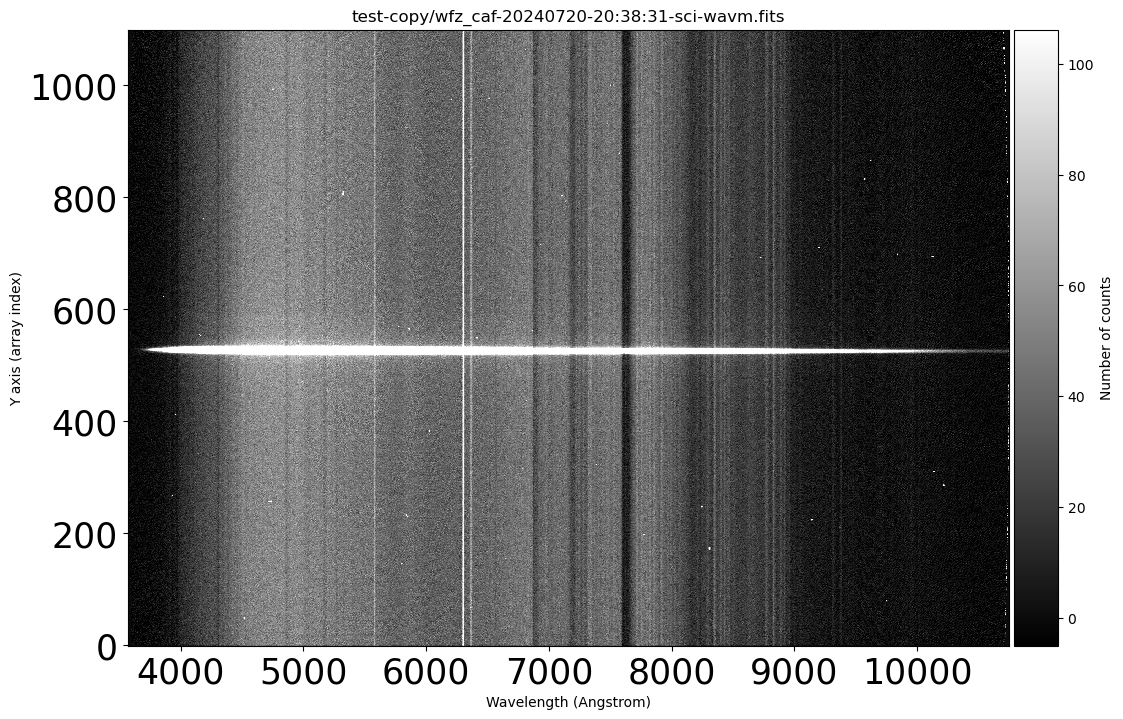

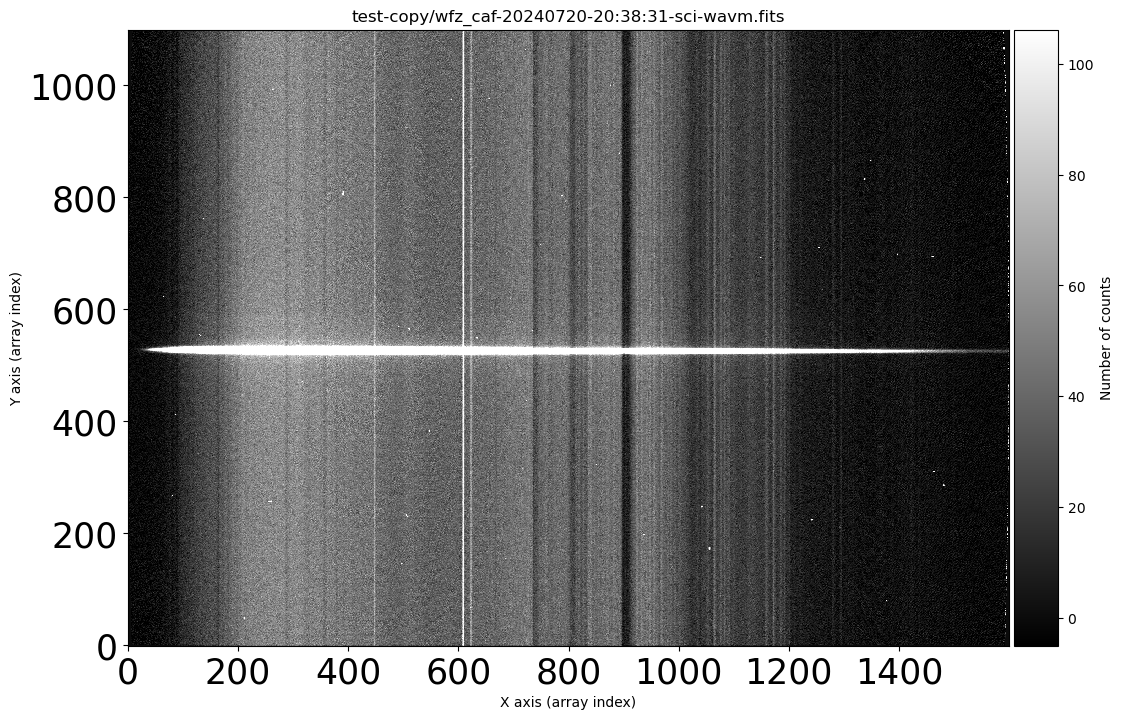

---
Select two empty background regions from the 2D image. They need to be at each side of the main object trace. They should not contain other traces. INTEGERS ONLY.
---


Skyregion1 y axis MIN:  200
Skyregion1 y axis MAX:  400
Skyregion2 y axis MIN:  800
Skyregion1 y axis MAX:  1000


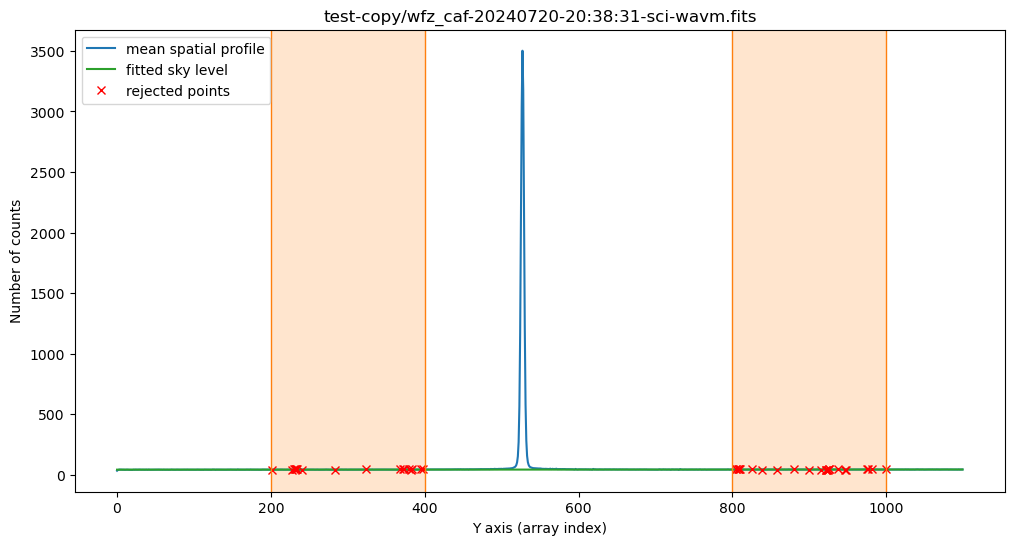

Are you okay with the background selection? (Type "yes" if so):  yes


  0%|          | 0/1600 [00:00<?, ?it/s]

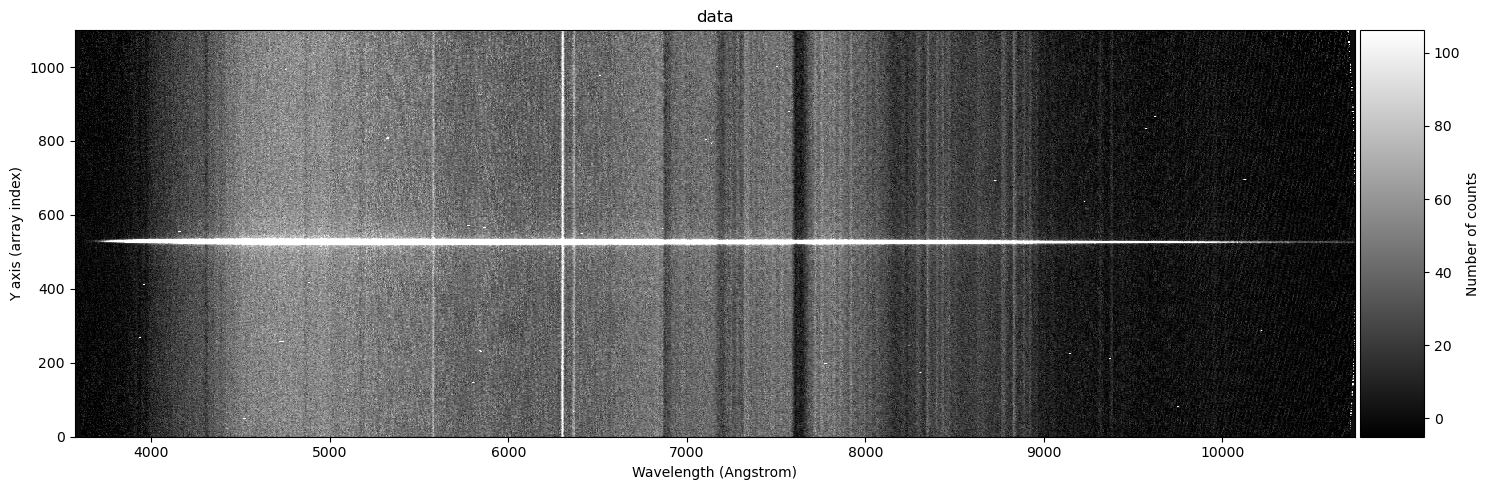

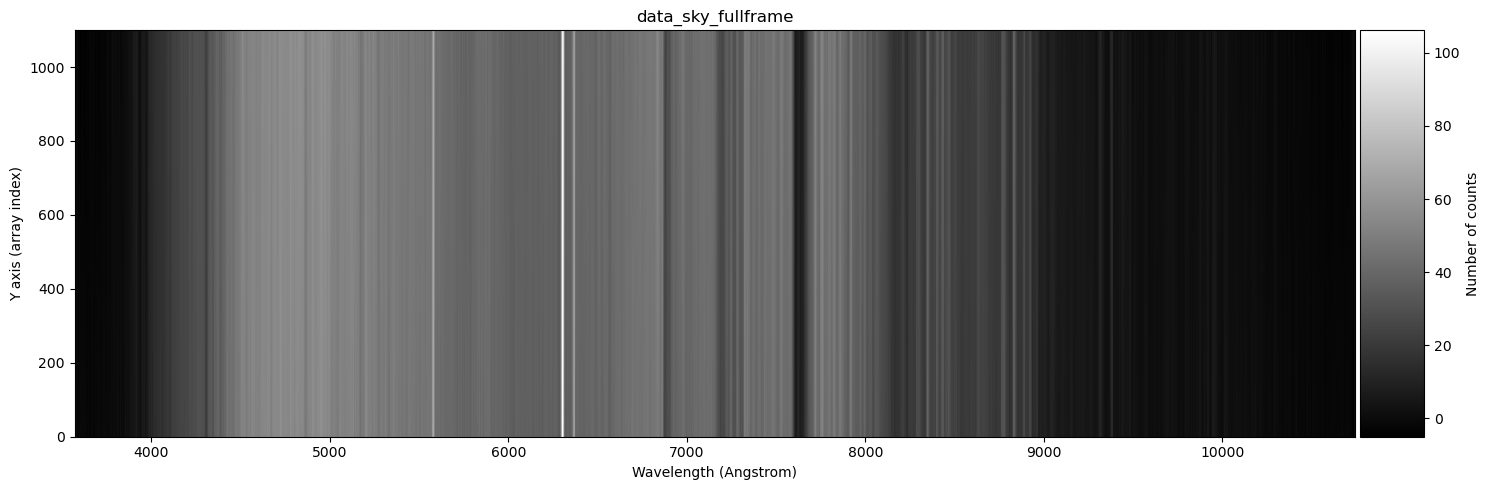

In [9]:
# Substracts the sky spectrum from a science image. 
# INPUTS REQUIRED: science image (1 input), ranges for the sky (4 inputs, min and max for each range), confirmation (1 input)
calib.sky_substraction()

  0%|          | 0/1 [00:00<?, ?it/s]

---
Index  //  filename  //  objectname
---
0  //  swfz_caf-20240720-20:38:31-sci-wavm.fits  //  Feige_66 g200
---


Chose file (select index from 0 to 0):  0


---
crpix1: 1.0 pix
crval1: 3.5726070224274e-07 m
cdelt1: 4.4839451125092e-10 m / pix
cunit1: 1.0 m
ctype1: AWAV
X axis max: 1599
---


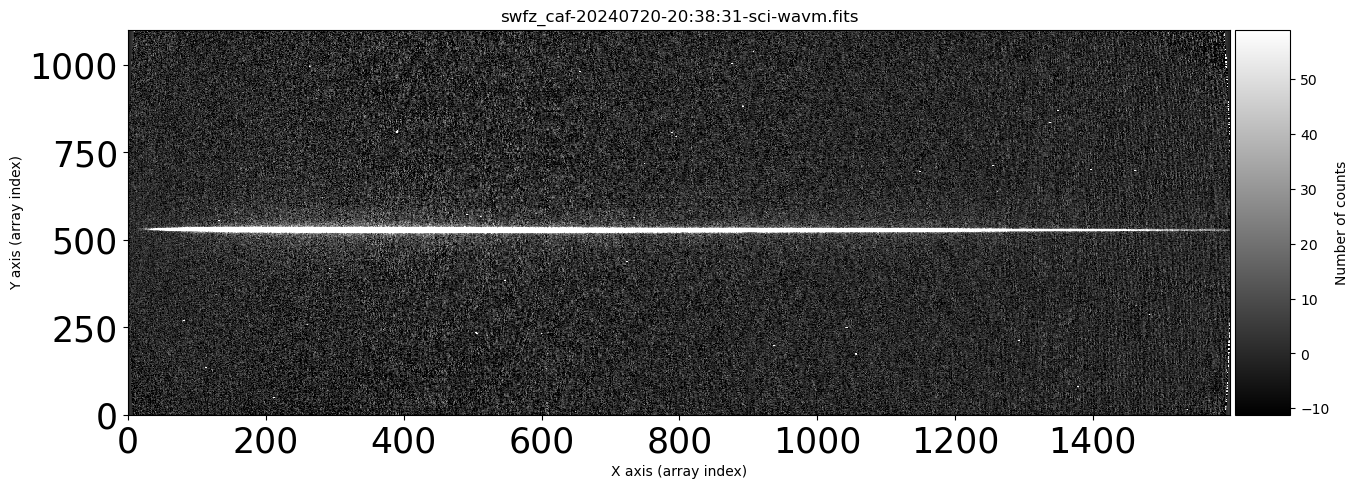

Chose the x and the y ranges with the spectral trace IN the window, to align the spectum. INTEGERS ONLY
---


x min:  0
x max:  1500
y min:  500
y max:  600


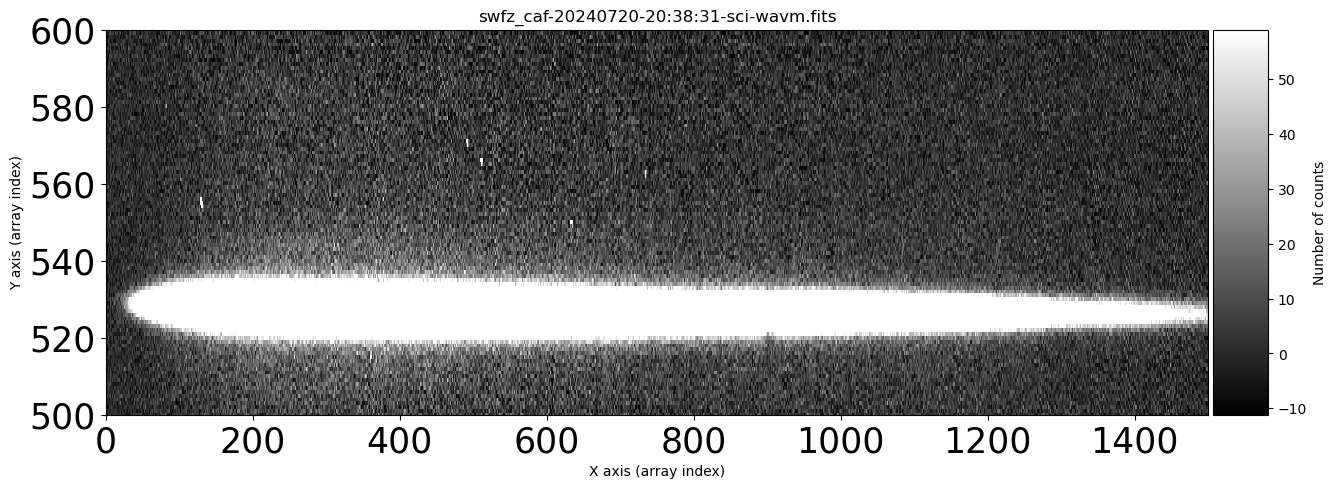

Are you okay with the selected ranges? (Type "yes" if so):  


---


x min:  0
x max:  1500
y min:  500
y max:  560


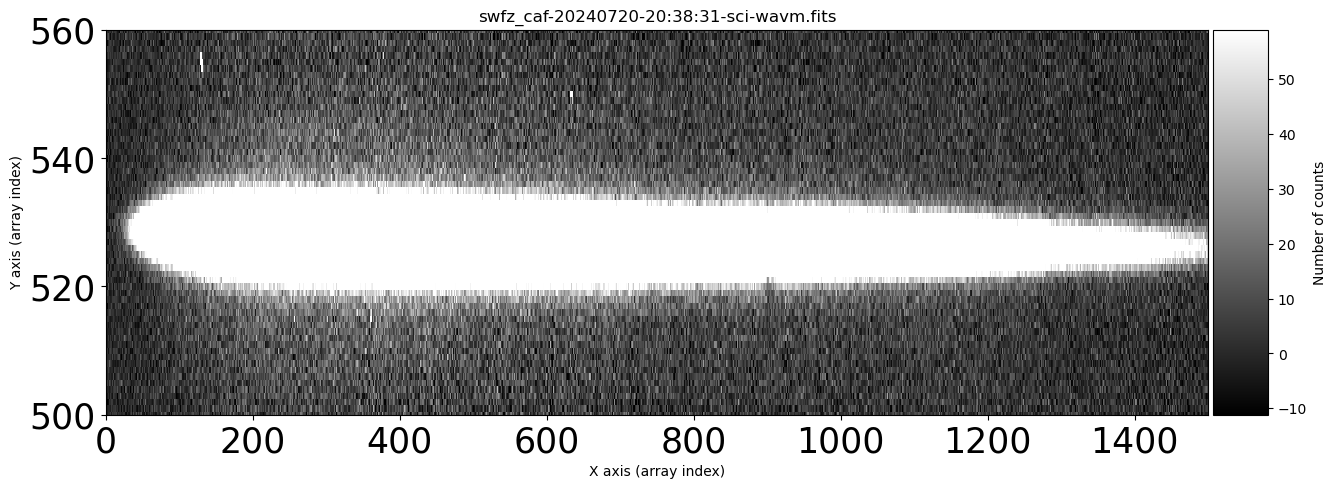

Are you okay with the selected ranges? (Type "yes" if so):  yes


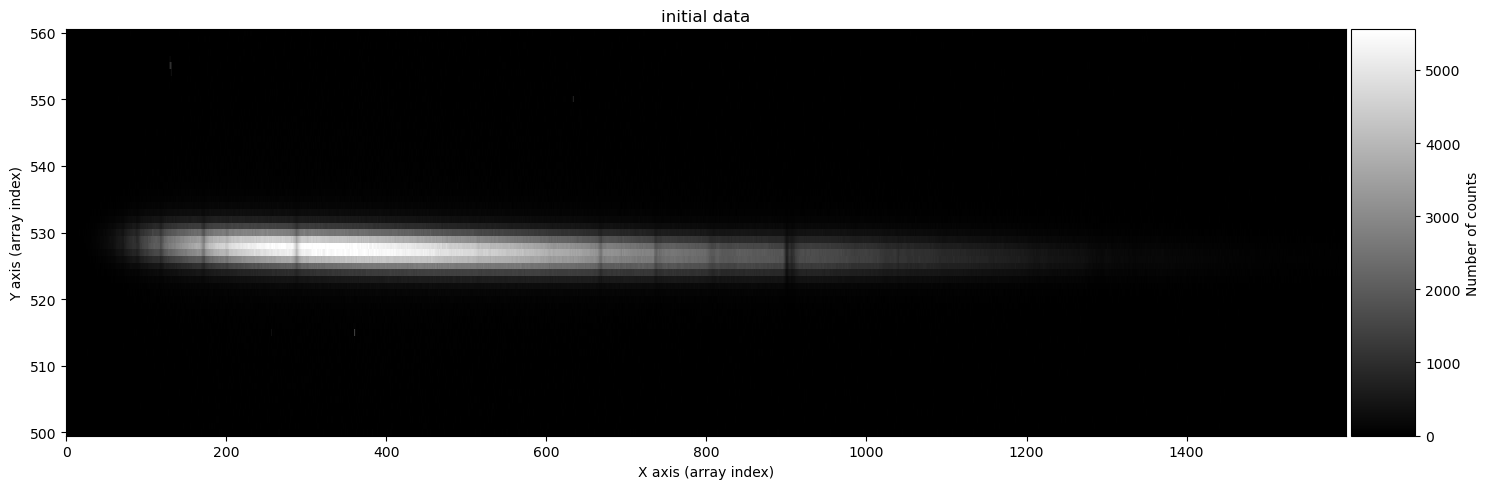

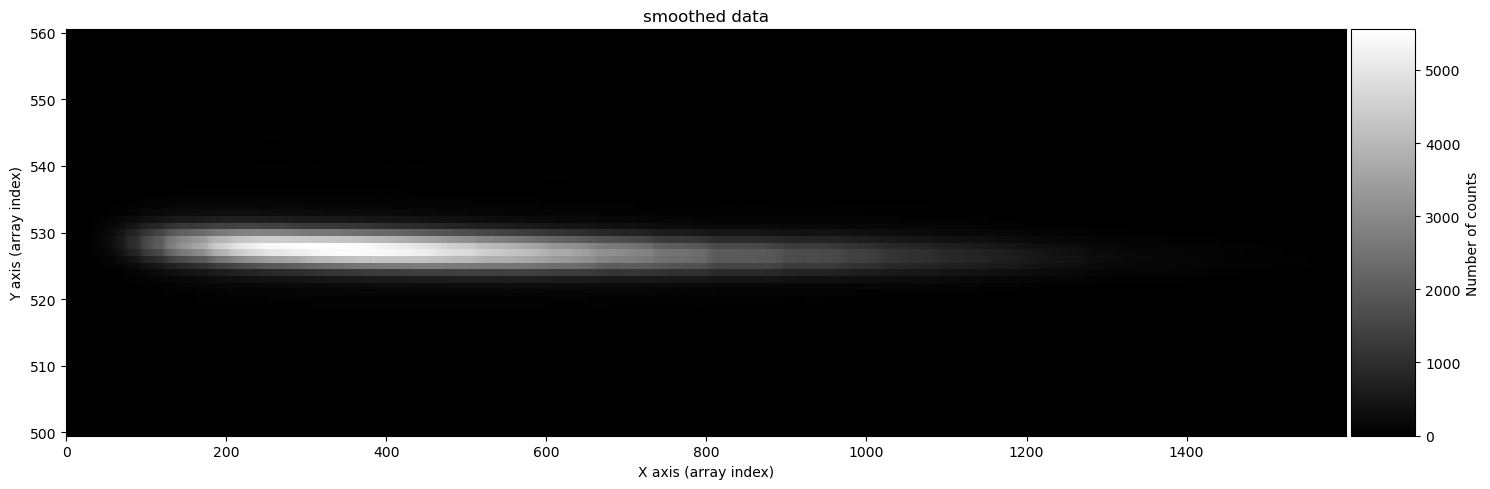

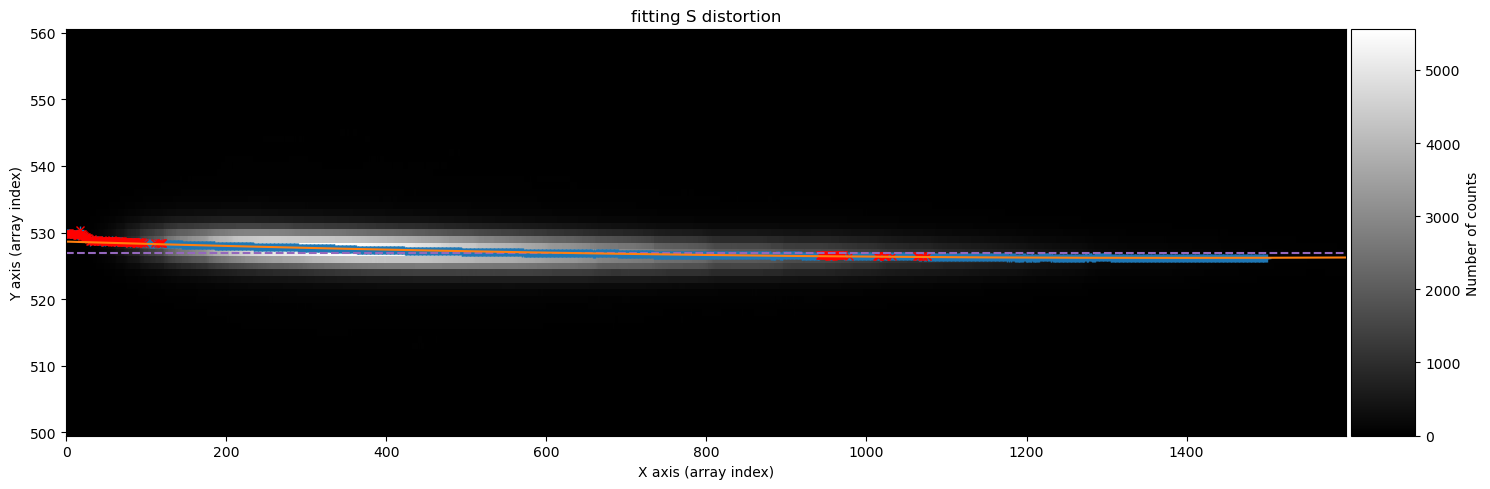

  0%|          | 0/1600 [00:00<?, ?it/s]

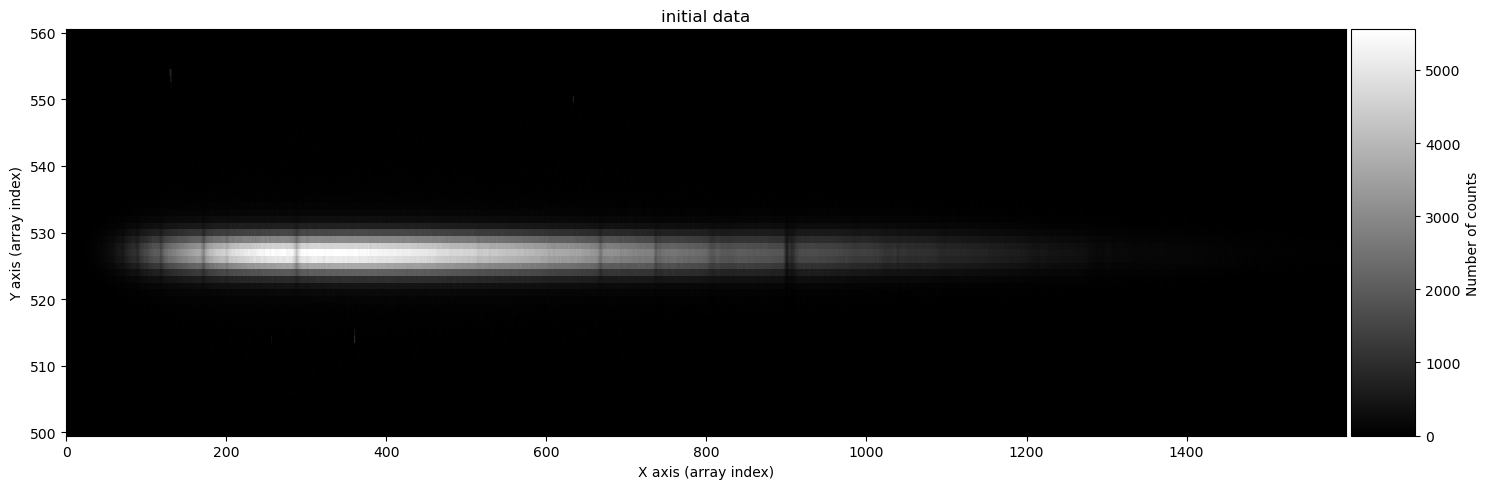

In [10]:
# Alignment of the spectrum. 
# INPUTS REQUIRED: science image (1 input), range to select trace (4 inputs, min and max for x and y), confirmation (1 input)
x_min, x_max, y_min, y_max = calib.spec_align()

---
The outputs (*x_min, x_max, y_min, y_max*) from the function above are used as an starting range for the following function (given as inputs). Nothing important, just fancy.

  0%|          | 0/1 [00:00<?, ?it/s]

---
Index  //  filename  //  objectname
---
0  //  dswfz_caf-20240720-20:38:31-sci-wavm.fits  //  Feige_66 g200
---


Chose file (select index from 0 to 0):  0


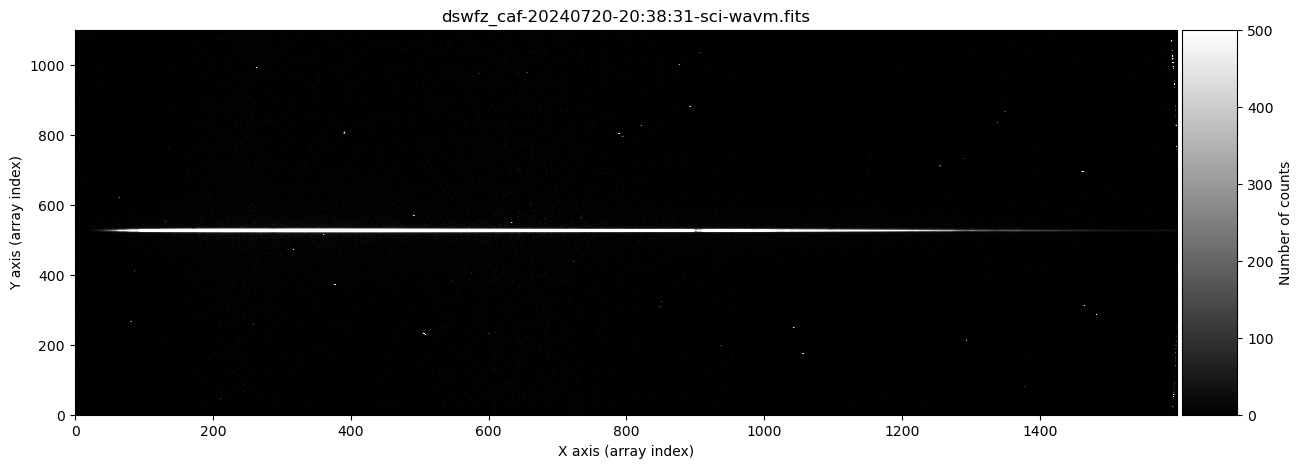

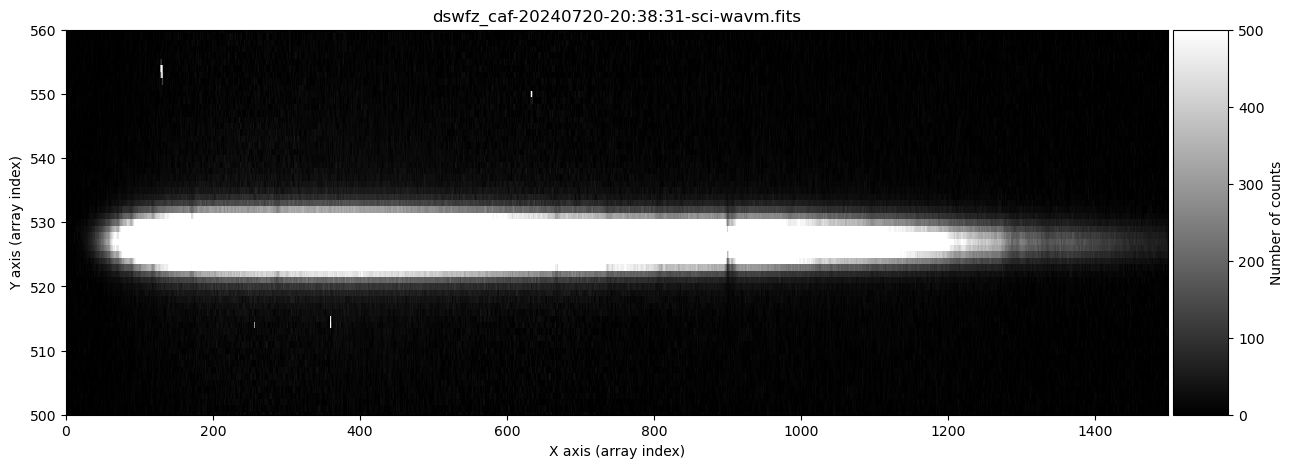

Chose the y range to extract the spectum. INTEGERS ONLY
---


y min:  520
y max:  535


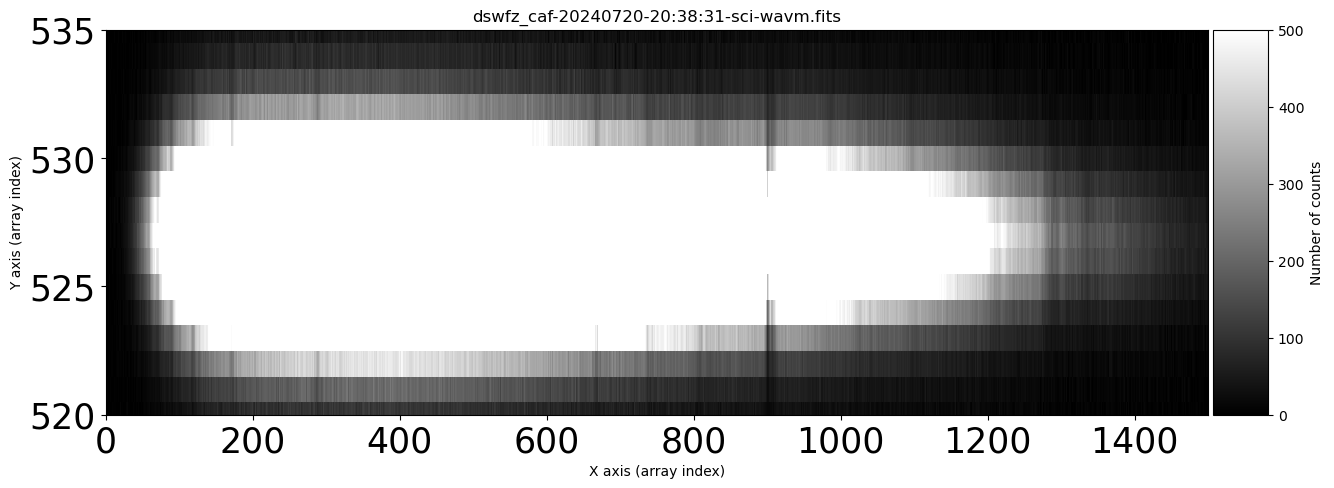

Are you okay with the selected range? (Type "yes" if so):  yes


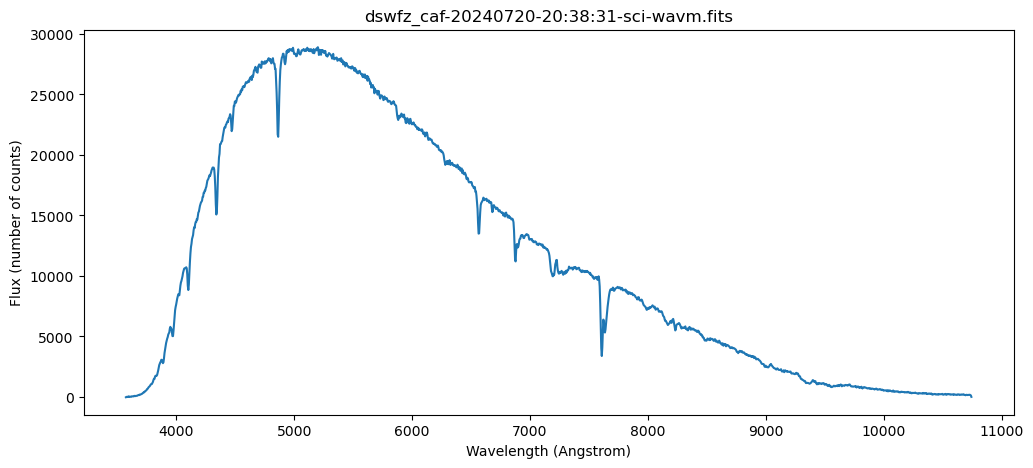

In [11]:
# Extract the spectrum: from the 2D image to a 1D spectrum
# INPUTS REQUIRED: science image (1 input), ranges for the trace (2 inputs, min and max for y), confirmation (1 input)
calib.spec_extract(x_min, x_max, y_min, y_max)

---
**IMPORTANT**: the ranges for the wavelength alignment are not strict, you can leave some room to the trace. But when extracing the spectrum, make the trace the only thing in the image before extracting (give a narrow range, you can iterate infinite times until you are happy with your range).
The 1D spectrum is saved in a fits file that starts with *dswfz*. The wavelength is in Angstroms and the flux in counts (or proportional to counts). 

Flux calibration (*flux_calibration()*)
---
You now need to flux calibrate your image using a standard star. You need a reduced science 1D spectrum, a reduced standard 1D spectrum, and the matching absolute standard flux (which is hopefully in the *Standard stars/* folder). IF IT IS NOT IN THE FOLDER, FIND THE ABS STANDARD FLUX (online?) AND ADD IT IN THE FOLDER WITH THE APPROPIATE FORMAT: ascii format, 4 columns: wavelength, flux (in untis of 'ergs/cm2/s/A*10**-16), mili-Jy and bandpass. If the flux is in AB mag, you can set **std_flux_mags=True** in **flux_calibration()** *in CAHA_CAFOS_pipe.py*.

In [7]:
#caf.flux_calibration()

  0%|          | 0/2 [00:00<?, ?it/s]

---
Index  //  filename  //  objectname
---
0  //  dswfz_caf-20240720-20:38:31-sci-wavm.fits  //  Feige_66 g200
1  //  dswfz_caf-20240720-22:24:10-sci-wavm.fits  //  AT2024psn G200
---


Chose a file to flux calibrate (select index from 0 to 1):  1
Chose a file with the observed standard star data (select index from 0 to 1):  0


---
Index  //  filename  //  objectname
---
0  //  .ipynb_checkpoints  //  IPYNB-CHECKPO
1  //  fbd25d4655.dat  //  BD25D4655
2  //  fbd28d4211.dat  //  BD28D4211
3  //  fbd33d2642.dat  //  BD33D2642
4  //  fbd75d325.dat  //  BD75D325
5  //  ffeige110.dat  //  FEIGE110
6  //  ffeige34.dat  //  FEIGE34
7  //  ffeige66.dat  //  FEIGE66
8  //  ffeige67.dat  //  FEIGE67
9  //  fg138_31.dat  //  G138-31
10  //  fg158_100.dat  //  G158-100
11  //  fg191b2b.dat  //  G191B2B
12  //  fg193_74.dat  //  G193-74
13  //  fg24_9.dat  //  G24-9
14  //  fg60_54.dat  //  G60-54
15  //  fgd108.dat  //  GD108
16  //  fgd248.dat  //  GD248
17  //  fgd50.dat  //  GD50
18  //  fgrw70d5824.dat  //  GRW70D5824
19  //  fhd93521.dat  //  HD93521
20  //  fhz21.dat  //  HZ21
21  //  fhz4.dat  //  HZ4
22  //  fhz44.dat  //  HZ44
23  //  fltt9491.dat  //  LTT9491
24  //  fngc7293.dat  //  NGC7293
25  //  fsa95_42.dat  //  SA95-42
---


Chose a file with the absolute flux calibration (select index from 0 to 25):  7


['wavelength', 'flux', 'milli-Jy', 'bandpass']
Consider between these wavelengths 3800.0 9200.0
['wavelength', 'flux']
['wavelength', 'flux']


/mnt/c/Users/admingerard/Documents/CAHA-CAFOS-pipeline/calibration.py:1418: ResourceWarning: unclosed file <_io.FileIO name='test-copy/dswfz_caf-20240720-22:24:10-sci-wavm.fits' mode='rb' closefd=True>
  raw_science = read_spec_from_fits(raw_science_file, wmin, wmax)
/mnt/c/Users/admingerard/Documents/CAHA-CAFOS-pipeline/calibration.py:1424: ResourceWarning: unclosed file <_io.FileIO name='test-copy/dswfz_caf-20240720-20:38:31-sci-wavm.fits' mode='rb' closefd=True>
  raw_std = read_spec_from_fits(raw_std_file, wmin, wmax)
/mnt/c/Users/admingerard/Documents/CAHA-CAFOS-pipeline/calibration.py:1505: RuntimeWarning: divide by zero encountered in divide
  plt.plot(raw_science["wavelength"], raw_science["flux"]/np.median(raw_science["flux"]), label="norm raw science counts/s")
/mnt/c/Users/admingerard/Documents/CAHA-CAFOS-pipeline/calibration.py:1505: RuntimeWarning: invalid value encountered in divide
  plt.plot(raw_science["wavelength"], raw_science["flux"]/np.median(raw_science["flux"]), 

Flux calibrated spectrum saved to: test-copy/dswfz_caf-20240720-22:24:10-sci-wavm.txt


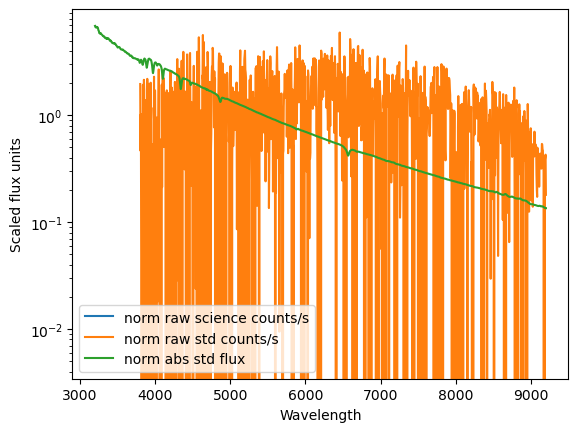

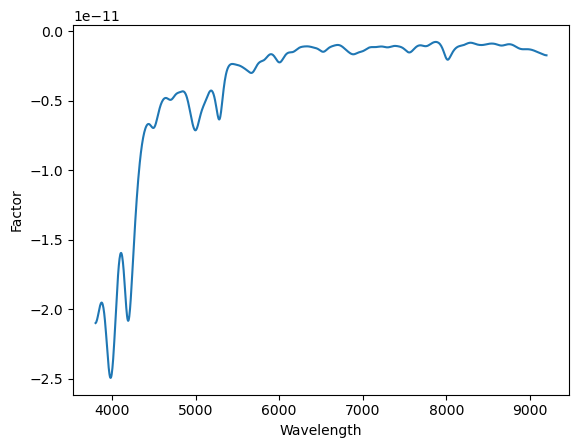

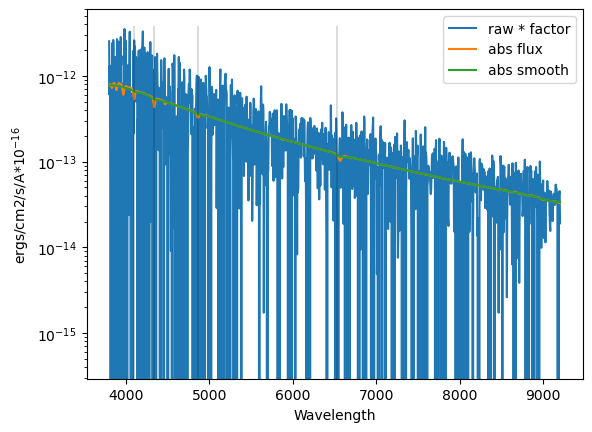

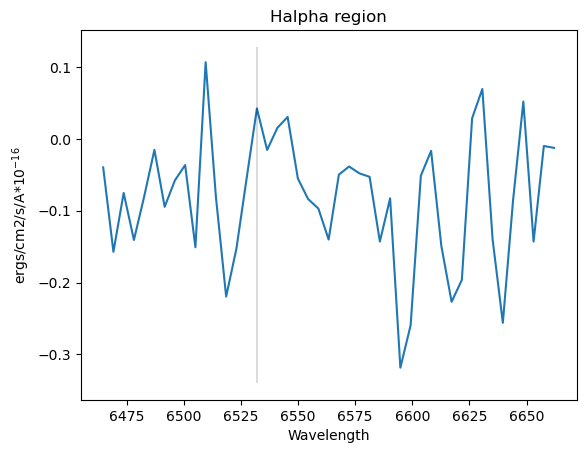

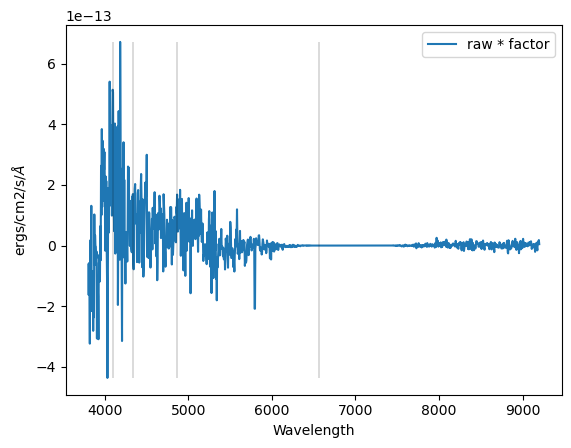

In [5]:
calib.flux_calib(std_flux_mags=False)